### [Density Estimation](https://scikit-learn.org/stable/modules/density.html)

- Density estimation is a combination of unsupervised learning, feature engineering, and data modeling. Some of the most popular techniques are mixture models (Gaussian Mixtures) and neighbor-based approaches (KernelDensity). 

- Gaussian Mixtures are discussed more fully in the context of clustering, because the technique is also useful as an unsupervised clustering scheme.

- Most people are already familiar with one common density estimation technique: the histogram.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version

In [3]:
# `normed` is being deprecated in favor of `density` in histograms
if parse_version(matplotlib.__version__) >= parse_version('2.1'):
    density_param = {'density': True}
else:
    density_param = {'normed': True}


(-0.02, 0.4)

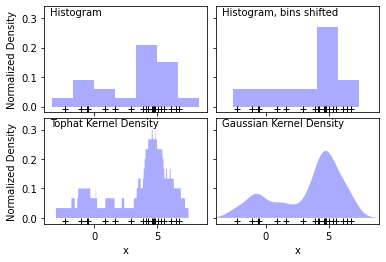

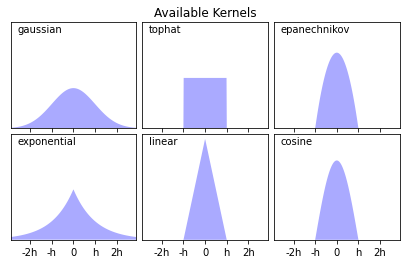

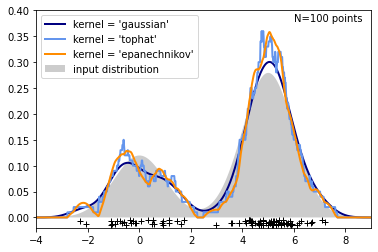

In [5]:
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', **density_param)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', **density_param)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)

def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

# ----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)

### [Histograms]()

- A histogram is a simple visualization of data where bins are defined, and the number of data points within each bin is tallied. 

- The choice of bins can have a major effect on the visualization. **(See upper-right panel, above)**. It shows a histogram over the same data, with the bins shifted right. The results of the two visualizations look entirely different, and might lead to different interpretations of the data.

- Think of a histogram as a stack of blocks, one block per point. By stacking the blocks in the appropriate grid space, we recover the histogram. What if *we center each block on the point it represents, and sum the total height at each location*? **(See lower-left panel, above)**. It is not as clean as a histogram, but letting the data drive the block locations is a much better representation.

- This visualization is an example of a kernel density estimation, in this case with a top-hat kernel (i.e. a square block at each point). 

- We can recover a *smoother distribution* with a smoother kernel. A Gaussian kernel density estimate, where *each point contributes a Gaussian curve to the total*, **(See lower-right panel)** returns a powerful non-parametric model of the distribution.

### [Kernel Density Estimation (KDE)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity)

- Uses the *Ball Tree* or *KD Tree* for queries (see Nearest Neighbors). 

- Can be done in any #dimensions - performance degrades in high dimensions.

- Kernel are positive functions controlled by `bandwidth`. The density estimate at a point within a group of points is given by $\rho_K(y) = \sum_{i=1}^{N} K(y - x_i; h)$.

- `bandwidth` acts as a "smoothing" parameter, controlling the  bias/variance tradeoff. Large bandwidth = smooth (high-bias) distribution; Small bandwidth = unsmooth (high-variance) distribution.

- Kernel options:
    - `kernel="gaussian"`: $K(x; h) \propto \exp(- \frac{x^2}{2h^2} )$
    - `kernel="tophat"`: $K(x; h) \propto 1$
    - `kernel="epanechnikov"`: $K(x; h) \propto 1 - \frac{x^2}{h^2}$
    - `kernel="exponential"`: $K(x; h) \propto \exp(-x/h)$
    - `kernel="linear"`: $K(x; h) \propto 1 - x/h$
    - `kernel="cosine"`: $K(x; h) \propto \cos(\frac{\pi x}{2h})$


- KDE can be used with any valid [distance metric](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric), though the results are properly normalized only for the Euclidean metric. 

- One useful metric is the *Haversine distance* which measures the *angular distance between points on a sphere*.

- KDE can learn a non-parametric generative model of a dataset to *draw new samples from this generative model*. See below.

### [Example: KDE for learning generative models (Digits)](https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#sphx-glr-auto-examples-neighbors-plot-digits-kde-sampling-py)

- enables drawing new samples which reflect underlying data model.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [8]:
digits = load_digits()

# project the 64-d data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

best bandwidth: 3.79269019073225


Text(0.5, 1.0, '"New" digits drawn from KDE')

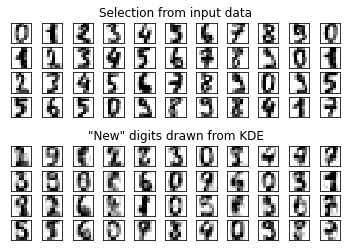

In [9]:
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from input data')
ax[5, 5].set_title('"New" digits drawn from KDE')